In [19]:
import pyaudio
import wave
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft, ifft
from scipy.signal import decimate
from constants import *
import math
import time

#import paho.mqtt.client as paho

from datetime import datetime
import json
import matplotlib.pyplot as plt

class stream():
    def __init__(self):
        self.audio_recording = pyaudio.PyAudio()
        self.stream = self.audio_recording.open(format=FORMAT, channels=CHANNELS,
                                                rate=RATE, input=True,
                                                frames_per_buffer=NUMBER_OF_POINTS)
        print self.stream

    def return_stream(self):
        frames = []
        for i in range(0, 3 * int(math.ceil(NUMBER_OF_POINTS * 1.0/ CHUNK))):
            data = self.stream.read(CHUNK, exception_on_overflow = False)
            frames.append(data)
        wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
        wf.setnchannels(CHANNELS)
        wf.setsampwidth(self.audio_recording.get_sample_size(FORMAT))
        wf.setframerate(RATE)
        wf.writeframes(b''.join(frames))
        wf.close()
        [rate, data] = read(WAVE_OUTPUT_FILENAME, 'r')
        #data = data[:5 * NUMBER_OF_POINTS,:]
        return data

    def stop_stream(self):
        self.stream.stop_stream()
        self.stream.close()
        self.audio_recording.terminate()

class doppler_velocity():
    
    def __init__(self, data):
        self.data = data
        '''
        print "data"
        print data'''
    '''def __init__(self, data, client):
        self.client = client
        self.data = data'''

    def return_doppler_velocity(self):
        self.data = (-1.0 * self.data) / 32768.0
        trig = self.data[:,0]
        self.data = np.asarray(self.data[:,1])
        trig = np.diff(trig)
        count = 0
        thresh = 0
        low_value_indexes = trig < thresh
        high_value_indexes = trig > thresh
        ''' 
        print "low"
        print low_value_indexes
        print "high"
        print low_value_indexes
        '''
        start = np.zeros([len(trig)], dtype = int)
        #print "start"
        #print start
        print len(start)
        start[low_value_indexes] = 0
        start[high_value_indexes] = 1
        sif = []
        aux = []
        for x in range(50, len(start)):
            '''
            print "in for"
            print "trigger"
            print trig
            print "start"
            print start
            '''
            '''
            print "startx-11x-1"
            print start[x-11:x-1]
            print "mean"
            print np.mean(start[x-11:x-1])'''

             
            if (start[x] == 1) and (np.mean(start[x-11:x-1]) == 0):
                print "in if"
                count = count + 1
                #print count
                #sif.append(s[x:x + N -1])
                #print self.data[x+20:NUMBER_OF_POINTS / 2 + x -1 - 20]
                sif.append(self.data[x+20:NUMBER_OF_POINTS / 2 + x -1 - 20]) #(NUMBER_OF_POINTS / 2.0)
               
                #time.append((x * 1.0) / fs)
                aux.append(trig[x+20:NUMBER_OF_POINTS / 2 + x - 1 - 20])# cambie 2.0 a 2
                break

        self.data = sif
        self.data = np.asarray(self.data)

        aux = np.asarray(aux)
        #print "here"
        #print self.data

        #plt.figure() #*
        #plt.plot(self.data[0])#*
        #plt.plot(aux[0])#*
        #plt.show()#*
        #print self.data.shape#*
        #print self.data.shape#*
        self.data = self.data - self.data.mean(axis = 0)#*
        self.data = decimate(x=self.data,q=3,n=11,ftype="fir")
        #print self.data#*
        print self.data.shape
        w = np.hanning(self.data.shape[1])
        #print self.data.shape#*
        aux = np.absolute(ifft(self.data[0]*w))#, n = ZERO_PADDING))#, n = ZERO_PADDING/6))
        #aux = aux - np.mean(aux)
        #aux = np.sum(aux,axis = 0)
        v =  20 * np.log10(aux)
        #v = np.fft.fftshift(v)
        v = v[0:v.shape[0]/4]
        #print v
        #v = v[0:100]
        #print v.shape
        v = v.astype(int)
        #print np.average(v)
        v  = json.dumps(v.tolist())
        data = { "heights": v,
                 "time": datetime.now().strftime("%G-%m-%d %H:%M:%S.%f").rstrip('0')}
        data = json.dumps(data)
        #self.client.publish("can_radar", data, qos=0)

record_test = stream()
'''
client = paho.Client()
#client.connect("104.236.221.13")
client.connect(IP_SERVER, port="1883")
client.loop_start()'''

while True:
   
    #print "aaaa"
    print record_test.return_stream()
    
    velocity_test = doppler_velocity(record_test.return_stream())
    #velocity_test = doppler_velocity(record_test.return_stream(), client)
    velocity_test.return_doppler_velocity()
    #print velocity_test.return_doppler_velocity()
    print "recording"
    time.sleep(3)

<pyaudio.Stream instance at 0x7f80ea775be0>
[[-32768 -29820]
 [-32768 -32768]
 [-32768 -29599]
 ...
 [-32768 -12807]
 [-32768 -11179]
 [-32768 -13108]]
12287
in if
(1, 611)
recording


/home/soporte/.local/lib/python2.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in log10


[[-32768  -4409]
 [-32768  -2012]
 [-32768  -4216]
 ...
 [-32768 -20062]
 [-32768 -20574]
 [-32768 -16292]]
12287
in if
(1, 611)
recording
[[-32768   2785]
 [-32768   5530]
 [-32768   4063]
 ...
 [-32768   2991]
 [-32768   3560]
 [-32768    151]]
12287
in if
(1, 611)
recording


KeyboardInterrupt: 

**Streaming V2**

<pyaudio.Stream instance at 0x7f360209a6e0>
[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf]


/home/soporte/.local/lib/python2.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: divide by zero encountered in log10


TypeError: Image data cannot be converted to float

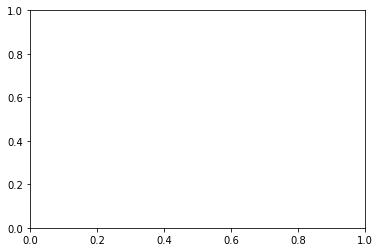

In [3]:
import pyaudio
import wave
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft, ifft
from scipy.signal import decimate
from constants import *
import math
import time

#import paho.mqtt.client as paho

from datetime import datetime
import json
import matplotlib.pyplot as plt

class stream():
    def __init__(self):
        self.audio_recording = pyaudio.PyAudio()
        self.stream = self.audio_recording.open(format=FORMAT, channels=CHANNELS,
                                                rate=RATE, input=True,
                                                frames_per_buffer=NUMBER_OF_POINTS)
        print self.stream

    def return_stream(self):
        frames = []
        for i in range(0, 3 * int(math.ceil(NUMBER_OF_POINTS * 1.0/ CHUNK))):
            data = self.stream.read(CHUNK, exception_on_overflow = False)
            frames.append(data)
        wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
        wf.setnchannels(CHANNELS)
        wf.setsampwidth(self.audio_recording.get_sample_size(FORMAT))
        wf.setframerate(RATE)
        wf.writeframes(b''.join(frames))
        wf.close()
        [rate, data] = read('running_outside_20ms.wav', 'r')
        #data = data[:5 * NUMBER_OF_POINTS,:]
        return data

    def stop_stream(self):
        self.stream.stop_stream()
        self.stream.close()
        self.audio_recording.terminate()

class Ranging():
    
    def __init__(self, data):
        self.data = data
    
    def return_ranging(self):
        #the input appears to be inverted
        self.data = (-1.0 * self.data) / 32768
        trig = self.data[:,0]
        self.data = np.asarray(self.data[:,1])
        
        trig = np.diff(trig)
        
        #parse the data here by triggering off rising edge of sync pulse
        count = 0
        thresh = 0
        low_value_indexes = trig < thresh
        high_value_indexes = trig > thresh
 
        start = np.zeros([len(trig)], dtype = int)
        start[low_value_indexes] = 0
        start[high_value_indexes] = 1
        
        sif = []
        aux = []
        
        for x in range(100, len(start)):
             
            if (start[x] == 1) and (np.mean(start[x-11:x-1]) == 0):
                
                count = count + 1
                #print count
                #sif.append(s[x:x + N -1])
                #print self.data[x+20:NUMBER_OF_POINTS / 2 + x -1 - 20]
                sif.append(self.data[x+20:NUMBER_OF_POINTS / 2 + x -1 - 20]) #(NUMBER_OF_POINTS / 2.0)
               
                #time.append((x * 1.0) / fs)
                aux.append(trig[x+20:NUMBER_OF_POINTS / 2 + x - 1 - 20])# cambie 2.0 a 2
                break

        self.data = sif
        self.data = np.asarray(self.data)

        aux = np.asarray(aux)

        self.data = self.data - self.data.mean(axis = 0)#*
        self.data = decimate(x=self.data,q=3,n=11,ftype="fir")
        #print self.data#*
        #print self.data.shape
        w = np.hanning(self.data.shape[1])
        #print self.data.shape#*
        aux = np.absolute(ifft(self.data[0]*w))#, n = ZERO_PADDING))#, n = ZERO_PADDING/6))
        #aux = aux - np.mean(aux)
        #aux = np.sum(aux,axis = 0)
        v =  20 * np.log10(aux)
        #v = np.fft.fftshift(v)
        v = v[0:v.shape[0]/4]
        print v
        #v = v[0:100]
        #print v.shape
        v = v.astype(int)
        
        #print np.average(v)
        #v  = json.dumps(v.tolist())
        #data = { "heights": v,
        #         "time": datetime.now().strftime("%G-%m-%d %H:%M:%S.%f").rstrip('0')}
        #data = json.dumps(data)
        #self.client.publish("can_radar", data, qos=0)

record_test = stream()
'''
client = paho.Client()
#client.connect("104.236.221.13")
client.connect(IP_SERVER, port="1883")
client.loop_start()'''

while True:
   
    #print "aaaa"
    #print record_test.return_stream()
    
    range_test = Ranging(record_test.return_stream())
    #velocity_test = doppler_velocity(record_test.return_stream(), client)
    qwe = range_test.return_ranging()
    #print velocity_test.return_doppler_velocity()

    #RTI plot
    #v = 20 * np.log10(np.absolute(ifft(sif2, zpad)))
    #S = (v[:,1:v.shape[1]/2])

    fig = plt.figure(1)
    im = plt.imshow(qwe, aspect = 'auto', cmap = 'jet', vmin=-80,vmax=0,extent=[0,200,80,0])
    cbar = plt.colorbar(im, orientation = 'vertical')
    plt.show()
    
    time.sleep(5)

**debug**

self
3573760
self2
3573760
selfsif
v2
(33,)
hallo
testttt
[-33 -30 -32 -44 -57 -69 -77 -72 -66 -59 -59 -74 -63 -63 -70 -70 -69 -67
 -63 -69 -67 -66 -64 -64 -67 -74 -79 -72 -73 -74 -84 -74 -75]


TypeError: Invalid dimensions for image data

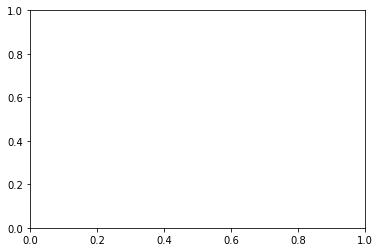

In [28]:
import pyaudio
import wave
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft, ifft
from scipy.signal import decimate
from constants import *
import math
import time
[rate, data] = read('running_outside_20ms.wav', 'r')

#print len(data)

def return_ranging(self):
    print "self"
    print len(self)
    
    #the input appears to be inverted
    self= (-1.0 * self) / 32768 #2¹⁵
    print "self2"
    print len(self)
    trig = self[:,0]
    self = np.asarray(self[:,1])
    trig = np.diff(trig) #no sé porque lo ponen
    

    #parse the data here by triggering off rising edge of sync pulse
    count = 0
    thresh = 0
    low_value_indexes = trig < thresh
    high_value_indexes = trig > thresh

    start = np.zeros([len(trig)], dtype = int)
    start[low_value_indexes] = 0
    start[high_value_indexes] = 1

    sif = []
    aux = []
    
    for x in range(100, len(start)):

        if (start[x] == 1) and (np.mean(start[x-11:x-1]) == 0):

            #count = count + 1
            #print count
            #sif.append(s[x:x + N -1])
            #print self.data[x+20:NUMBER_OF_POINTS / 2 + x -1 - 20]


            sif.append(self[x+20:NUMBER_OF_POINTS / 2 + x -1 - 20]) #(NUMBER_OF_POINTS / 2.0)

            #time.append((x * 1.0) / fs)
            aux.append(trig[x+20:NUMBER_OF_POINTS / 2 + x - 1 - 20])# cambié 2.0 a 2
            break

    self = sif
    self = np.asarray(self)
    
    print "selfsif"
    #print self[0,0:100]
    aux = np.asarray(aux)

    #self = self - self.mean(axis = 0)#*
    self = decimate(x=self,q=3,n=11,ftype="fir")
    #print self#*
    #print self.data.shape
    
    w = np.hanning(self.shape[1])
    #print self.data.shape#*
    aux = np.absolute(ifft(self[0]*w))#, n = ZERO_PADDING))#, n = ZERO_PADDING/6))
    #print "aux"
    #print aux
    #aux = aux - np.mean(aux)
    #aux = np.sum(aux,axis = 0)

    v =  20 * np.log10(aux)
    #print "v1"
        print w.shape
    #print v
    #v = np.fft.fftshift(v)
    v = v[0:v.shape[0]/4]
    print "v2"
    #print v
    print v.shape
    
    #v = v[0:100]
    #print v.shape
    v = v.astype(int)
    return v
'''
    #print np.average(v)
    #v  = json.dumps(v.tolist())
    #data = { "heights": v,
    #         "time": datetime.now().strftime("%G-%m-%d %H:%M:%S.%f").rstrip('0')}
    #data = json.dumps(data)
    #self.client.publish("can_radar", data, qos=0)
'''

#while True:
    
testttt=return_ranging(data)
print "hallo"

fig = plt.figure(1)
print "testttt"
print testttt
im = plt.imshow(testttt, aspect = 'auto', cmap = 'jet', vmin=-80,vmax=0,extent=[0,200,80,0])
cbar = plt.colorbar(im, orientation = 'vertical')
plt.show()

time.sleep(5)
        

In [46]:
import pyaudio
import wave
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft, ifft
from scipy.signal import decimate
from constants import *
import math
import time
[rate, data] = read('running_outside_20ms.wav', 'r')
print len(data[:,0])
print rate
#print data[1800:2000,:]

#constants
c = 299792458.0 #(m/s) speed of light

#radar parameters
Tp = 20 * 1E-3 #(s) pulse time
N = int(Tp * fs) # Number of samples per pulse
fi = 2260 * 1E6 #(Hz) LFM start frequency for example
ff = 2590 * 1E6 #(Hz) LFM stop frequency for example
BW = ff-fi #(Hz) transmti bandwidth
f = np.linspace(fi, ff, N/2) #instantaneous transmit frequency

#range resolution
rr = c/(2*BW)
max_range = rr*(N/2)

data = (-1.0 * data) / 32768

print len(data)

3573760
44100
3573760


**RTI Range**

/home/soporte/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log10


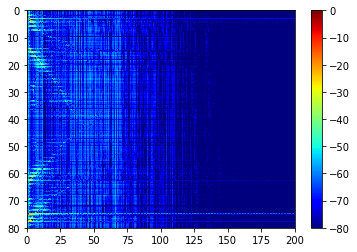

In [4]:
import wave
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt

[fs, data] = read('running_outside_20ms.wav', 'r')

#constants
c = 299792458.0 #(m/s) speed of light

#radar parameters
Tp = 20 * 1E-3 #(s) pulse time
N = int(Tp * fs) # Number of samples per pulse
fi = 2260 * 1E6 #(Hz) LFM start frequency for example
ff = 2590 * 1E6 #(Hz) LFM stop frequency for example
BW = ff-fi #(Hz) transmti bandwidth
f = np.linspace(fi, ff, N/2) #instantaneous transmit frequency

#range resolution
rr = c/(2*BW)
max_range = rr*(N/2)

data = (-1.0 * data) / 32768
#the input appears to be inverted
trig = data[:,0]
s = data[:,1]

#parse the data here by triggering off rising edge of sync pulse
count = 0
thresh = 0
low_value_indexes = trig < thresh
high_value_indexes = trig > thresh

start = np.zeros([len(trig)], dtype = int)
start[low_value_indexes] = 0
start[high_value_indexes] = 1

sif = []
time = []

for x in range(100, len(start) - N):
    if ((start[x] == 1) and (np.mean(start[x-11:x-1]) == 0)):
        count = count + 1
        sif.append(s[x:x + N -1])
        time.append((x * 1.0) / fs)

        
sif = np.array(sif)
time = np.array(time)

sif = np.transpose(np.transpose(sif) - (np.mean(sif, axis = 1)))

zpad = (8 * N) / 2

sif2 = sif[2:sif.shape[0],:] - sif[1:sif.shape[0] - 1,:]

#RTI plot
v = 20 * np.log10(np.absolute(ifft(sif2, zpad)))
S = (v[:,1:v.shape[1]/2])

fig = plt.figure(1)
im = plt.imshow((S - np.amax(v)), aspect = 'auto', cmap = 'jet', vmin=-80,vmax=0,extent=[0,200,80,0])
cbar = plt.colorbar(im, orientation = 'vertical')
plt.show()


***RTI V2***

data
3573760
sif array
881
3810
3810
Tiempo
[3.88208617e-02 3.88435374e-02 8.12244898e-02 ... 8.09407710e+01
 8.09833333e+01 8.09833560e+01]


/home/soporte/.local/lib/python2.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log10


TypeError: Dimensions of C (3808, 1763) are incompatible with X (3528) and/or Y (3810); see help(pcolormesh)

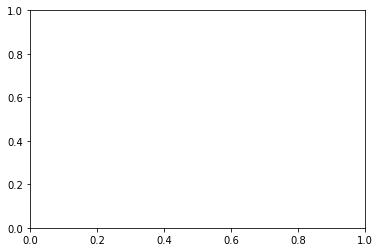

In [78]:
import wave
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from rti import *

[fs, data] = read('running_outside_20ms.wav', 'r')

#constants
c = 3*1E8 #(m/s)#c = 299792458.0 #(m/s) speed of light

#radar parameters
Tp = 20 * 1E-3 #(s) pulse time
N = int(Tp * fs) # Number of samples per pulse
fi = 2260 * 1E6 #(Hz) LFM start frequency for example
ff = 2590 * 1E6 #(Hz) LFM stop frequency for example
BW = ff-fi #(Hz) transmti bandwidth
f = np.linspace(fi, ff, N/2) #instantaneous transmit frequency

#range resolution
rr = c/(2*BW)
max_range = rr*(N/2)

data = (-1.0 * data) / 32768
print "data"
print len(data)
#the input appears to be inverted
trig = data[:,0]
s = data[:,1]

#parse the data here by triggering off rising edge of sync pulse
count = 0
thresh = 0
low_value_indexes = trig < thresh
high_value_indexes = trig > thresh

start = np.zeros([len(trig)], dtype = int)
start[low_value_indexes] = 0
start[high_value_indexes] = 1

sif = []
time = []

for x in range(100, len(start) - N):
    if ((start[x] == 1) and (np.mean(start[x-11:x-1]) == 0)):
        count = count + 1
        #print s
        sif.append(s[x:x + N -1])
        time.append((x * 1.0) / fs)

#print "sif append"
#print len(sif[1,:])
#print len(sif[:,1])
        
sif = np.array(sif)
time = np.array(time)
print "sif array"
print len(sif[1,:])
print len(sif[:,1])
 

sif = np.transpose(np.transpose(sif) - (np.mean(sif, axis = 1)))
print len(sif)
zpad = (8 * N) / 2

sif2 = sif[2:sif.shape[0],:] - sif[1:sif.shape[0] - 1,:]

##################

#RTI plot
v = 20 * np.log10(np.absolute(ifft(sif2, zpad)))
S = (v[:,1:v.shape[1]/2])

#plot(S-np.amax(v))

print "Tiempo"
print time

fig = plt.figure(1)
#im = plt.imshow(S - np.amax(v), aspect = 'auto', cmap = 'jet', vmin=-80,vmax=0,extent=[0,200,80,0])
im = plt.pcolormesh(np.linspace(0,max_range,zpad),time, S - np.amax(v), cmap='jet',vmin=-80,vmax=0)
cbar = plt.colorbar(im, orientation = 'vertical')
plt.show()


**Debug RTI**

In [2]:
import wave
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from rti import *

[fs, data] = read('running_outside_20ms.wav', 'r')

#constants
c = 3*1E8 #(m/s)#c = 299792458.0 #(m/s) speed of light

#radar parameters
Tp = 20 * 1E-3 #(s) pulse time
N = int(Tp * fs) # Number of samples per pulse
fi = 2260 * 1E6 #(Hz) LFM start frequency for example
ff = 2590 * 1E6 #(Hz) LFM stop frequency for example
BW = ff-fi #(Hz) transmti bandwidth
f = np.linspace(fi, ff, N/2) #instantaneous transmit frequency

#range resolution
rr = c/(2*BW)
max_range = rr*(N/2)

#the input appears to be inverted
data = (-1.0 * data)
print "data"
print len(data)
trig = data[:,0]
s = data[:,1]

#parse the data here by triggering off rising edge of sync pulse
count = 0
thresh = 0
low_value_indexes = trig < thresh
high_value_indexes = trig > thresh

start = np.zeros([len(trig)], dtype = int)
start[low_value_indexes] = 0
start[high_value_indexes] = 1


'''
sif = []
time = []
############## NOT WORKING ########################

for x in range(100, len(start) - N):
    if ((start[x] == 1) and (np.mean(start[x-11:x-1]) == 0)):
        count = count + 1
        #print s
        sif.append(s[x:x + N -1])
        print sif
        time.append((x * 1.0) / fs)'''
'''
#print "sif append"
#print len(sif[1,:])
#print len(sif[:,1])
        
sif = np.array(sif)
time = np.array(time)
print "sif array"
print len(sif[1,:])
print len(sif[:,1])
 

sif = np.transpose(np.transpose(sif) - (np.mean(sif, axis = 1)))
print len(sif)
zpad = (8 * N) / 2

sif2 = sif[2:sif.shape[0],:] - sif[1:sif.shape[0] - 1,:]
'''

data
3573760


'\n#print "sif append"\n#print len(sif[1,:])\n#print len(sif[:,1])\n        \nsif = np.array(sif)\ntime = np.array(time)\nprint "sif array"\nprint len(sif[1,:])\nprint len(sif[:,1])\n \n\nsif = np.transpose(np.transpose(sif) - (np.mean(sif, axis = 1)))\nprint len(sif)\nzpad = (8 * N) / 2\n\nsif2 = sif[2:sif.shape[0],:] - sif[1:sif.shape[0] - 1,:]\n'